In [6]:
# importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("mymoviedb.csv",lineterminator='\n')
print(df)

     Release_Date                                 Title  \
0      2021-12-15               Spider-Man: No Way Home   
1      2022-03-01                            The Batman   
2      2022-02-25                               No Exit   
3      2021-11-24                               Encanto   
4      2021-12-22                        The King's Man   
...           ...                                   ...   
9822   1973-10-15                              Badlands   
9823   2020-10-01                      Violent Delights   
9824   2016-05-06                          The Offering   
9825   2021-03-31  The United States vs. Billie Holiday   
9826   1984-09-23                               Threads   

                                               Overview  Popularity  \
0     Peter Parker is unmasked and no longer able to...    5083.954   
1     In his second year of fighting crime, Batman u...    3827.658   
2     Stranded at a rest stop in the mountains durin...    2618.087   
3     T

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
# viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
# exploring genres column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
# check for duplicated rows
df.duplicated().sum()

0

In [7]:
# exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
print(df['Release_Date'].dtypes)

In [ ]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

In [ ]:
df.info()

In [ ]:
df.head()

# Dropping The Columns Like Dropping Overview, Original_Languege
# and Poster-Url


In [46]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [48]:
# dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [50]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


# categorizing Vote_Average column
We would cut the Vote_Average values and make 4 categories: popular average
below_avg not_popular to describe it more using catigorize_col() function
provided above.

In [13]:
def catigorize_col (df, col, labels):

# setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [11]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
catigorize_col(df, 'Vote_Average', labels)
# confirming changes
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [9]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [15]:
# exploring column
df['Vote_Average'].value_counts()


Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [17]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [19]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,below_avg,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,average,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


we'd split genres into a list and then
explode our dataframe to have only one
genre per row for ezch movie

In [21]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,popular,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,popular,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [23]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Release_Date       25552 non-null  object  
 1   Title              25552 non-null  object  
 2   Overview           25552 non-null  object  
 3   Popularity         25552 non-null  float64 
 4   Vote_Count         25552 non-null  int64   
 5   Vote_Average       25552 non-null  category
 6   Original_Language  25552 non-null  object  
 7   Genre              25552 non-null  category
 8   Poster_Url         25552 non-null  object  
dtypes: category(2), float64(1), int64(1), object(5)
memory usage: 1.4+ MB


In [27]:
df.nunique()

Release_Date         5846
Title                9415
Overview             9722
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
Poster_Url           9727
dtype: int64

# Data Visualization
here, we'd use Matplotlib and seaborn for making some informative visuals to gain
insights abut our data.


In [29]:
# setting up seaborn configurations
sns.set_style('whitegrid')


 # Q1: What is the most frequent genre of movies released on Netflix ?
   the dataset?


In [33]:
# showing stats. on genre column
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

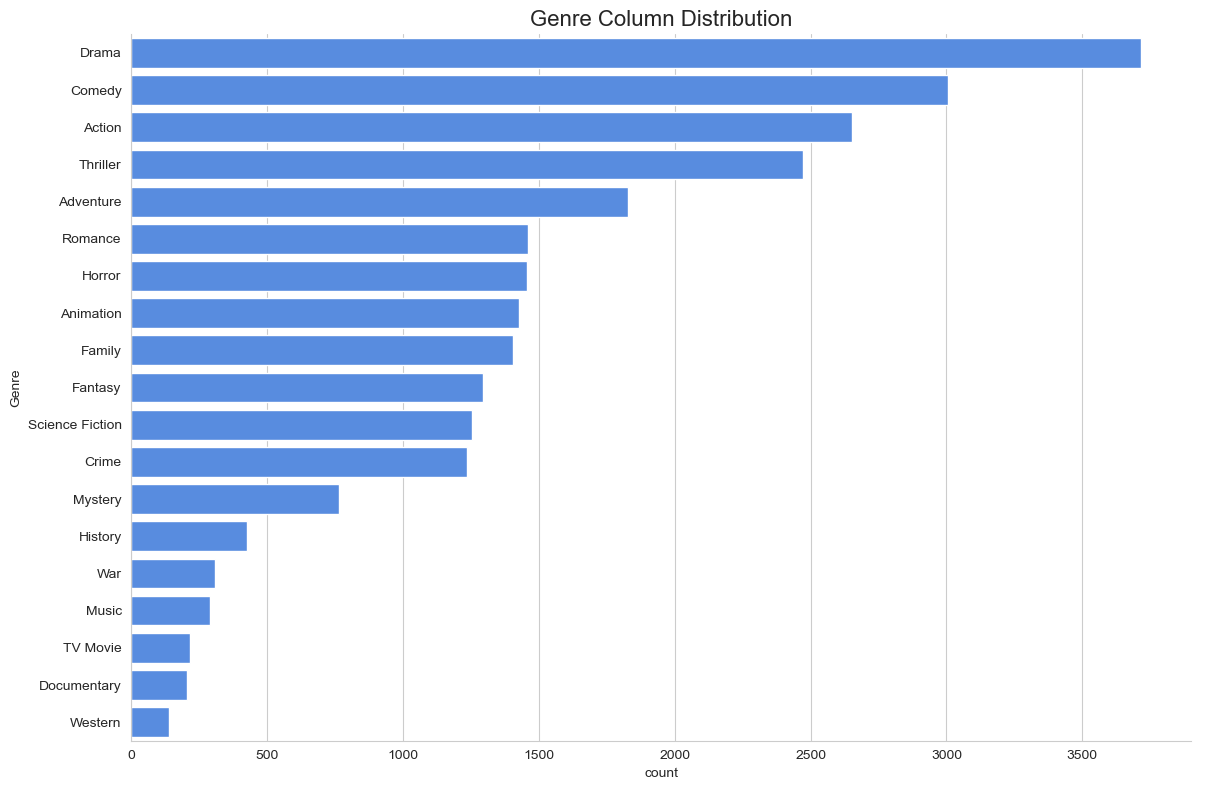

In [31]:
# Plotting genre distribution
sns.catplot(
    y='Genre',
    data=df,
    kind='count',
    order=df['Genre'].value_counts().index,
    color='#4287f5',
    height=8,        # height of the plot
    aspect=1.5       # aspect ratio (width = height * aspect)
)

plt.title('Genre Column Distribution', fontsize=16)
plt.tight_layout()
plt.show()

# Q2 Which Has Highest votes in vote avg column?

In [52]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


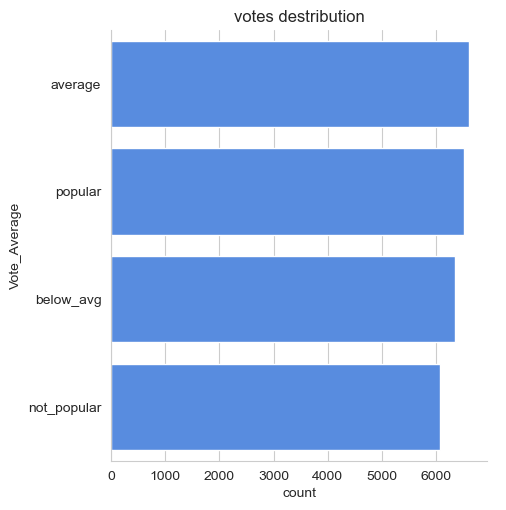

In [35]:
# visualizing vote_average column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
 order = df['Vote_Average'].value_counts().index,
 color = '#4287f5')
plt.title('votes destribution')
plt.show()

# Q3: What movie got the highest popularity ? what's its
# genre ?


In [56]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [58]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# Q4: What movie got the lowest popularity? what's
# its genre?

In [14]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
9825,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...
9826,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,"War, Drama, Science Fiction",https://image.tmdb.org/t/p/original/lBhU4U9Eeh...


# Conclusion

In [ ]:
Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than
14% of the times among 19 other genres.
    
Q2: What genres has highest votes ?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the
highest popularity among fans by being having more than 18.5% of movies popularities.
    
Q3: What movie got the highest popularity ? what's its genre ?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has
genres of Action , Adventure and Sience Fiction .

Q4: What movie got the lowest popularity ? what's its genre ?
The united states, thread' has the highest lowest rate in our dataset
and it has genres of music , drama , 'war', 'sci-fi' and history`.


# THANK YOU